# Tool Summary - handwritten digit identification

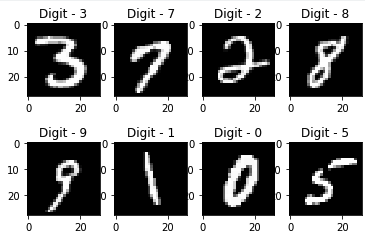


This notebook demonstrates an end-to-end example of training and applying a convolutional neural network (CNN) for image classification using handwritten numerical digits. The workflow walks through model definition, training, and evaluation on a standard digit dataset, and then applies the trained model to classify new, previously unseen images.  

This example is intentionally lightweight and approachable, making it suitable both as an educational reference and as a starting point for adapting similar techniques to more complex image recognition or computer vision tasks. 

**When you are ready, click in the next cell and press \<shift\>-\<return\> to start running that cell** 

You will see a progress report under the cell, and when you see 'ALL DONE', your CNN model has been trained and ready for use.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
tf.get_logger().setLevel('ERROR')

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile, train, and save model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)
model.save('handwritten.model.keras')

print('ALL DONE')

# Run the model

Now you are ready to test your trained model against some images of handwritten numbers. 

**When you are ready, click in the next cell and press \<shift\>-\<return\> to start running that cell** 

Scroll down to see your CNN at work.

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# Load your model
model = tf.keras.models.load_model('handwritten.model.keras')

image_number = 1
while os.path.isfile(f"./test-numbers/digit_{image_number}.png"):
    try:
        # Read the image in grayscale
        img = cv2.imread(f"./test-numbers/digit_{image_number}.png", cv2.IMREAD_GRAYSCALE)

        # Check if image was loaded successfully
        if img is None:
            print(f"Could not load digit_{image_number}.png")
            image_number += 1
            continue

        # Resize to 28x28 if needed (MNIST standard)
        if img.shape != (28, 28):
            img = cv2.resize(img, (28, 28))

        # Normalize to 0-1 range
        img = img.astype(np.float32) / 255.0

        # Invert if needed (MNIST has white digits on black background)
        # Check if digit appears to be dark on light background
        if np.mean(img) > 0.5:
            img = 1.0 - img

        # Reshape for model input: (1, 28, 28, 1) for typical CNN models
        img_reshaped = img.reshape(1, 28, 28, 1)

        # Make prediction
        prediction = model.predict(img_reshaped, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        print(f"Image {image_number}: This digit is probably a {predicted_digit} (confidence: {confidence:.1f}%)")

        # Display the image
        plt.figure(figsize=(3, 3))
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {predicted_digit}")
        plt.axis('off')
        plt.show()

        image_number += 1

    except Exception as e:
        print(f"Error processing digit_{image_number}.png: {e}")
        image_number += 1